In [3]:
import argument_based_agent as agent
import llamaAPI as LLM_API
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt

In [4]:
def get_argument_by_number(file_path, argument_number):
    with open(file_path, "r") as file:
        content = file.read()
    arguments = content.split("\n\n")
    if argument_number < 1 or argument_number > len(arguments):
        return "Invalid argument number. Please provide a number between 1 and 25."
    return arguments[argument_number - 1].strip()

statement = "People should have a right to keep and bear arms."

In [4]:
pro_arguments = [get_argument_by_number("pro_arguments.txt", i) for i in [1, 4, 6]]
con_arguments = [get_argument_by_number("con_arguments.txt", i) for i in [7, 5, 3, 2]]
# opinion = LLM_API.callLLM(f"Pro-arguments: {pro_arguments}\nCon-arguments: {con_arguments}. You may use some of them internally but only to make up an opinion to express.", f"Generate opinion about the statement: {statement} using pros and cons and maybe coming up with some new ones. You are more likely to be agains gun legalization, behave more personal, like a human - your opinion may change.")
opinion = LLM_API.callLLM(f"Pro-arguments: {pro_arguments}\nCon-arguments: {con_arguments}. You may use some of them internally but only to make up an opinion to express.", f"Generate opinion about the statement: {statement} using pros and cons and maybe coming up with some new ones. You are highly polarized agains gun legalization, you don't want that, behave more personal, like a human - your opinion may change.")

agent_instance = agent.Agent(**{
    "user_id": 1,
    "pro_arguments": pro_arguments,
    "con_arguments": con_arguments,
    "opinion": opinion,
    "polarity": agent.classify_opinion_numerically(statement, opinion)
})

print(agent_instance.polarity)

4


In [3]:
# agent is against gun legalization

num_of_args = 5
times = 10
score_values = np.ndarray(shape=(num_of_args, num_of_args, times))
for i in range(num_of_args):
    for j in range(num_of_args):
        for tm in range(times):
            pro_arguments = [get_argument_by_number("pro_arguments.txt", i) for i in np.random.randint(1, 26, size=i)]
            con_arguments = [get_argument_by_number("con_arguments.txt", i) for i in np.random.randint(1, 26, size=j)]
            opinion = LLM_API.callLLM(f"Pro-arguments: {pro_arguments}\nCon-arguments: {con_arguments}. You may use some of them internally but only to make up an opinion to express.", f"Generate opinion about the statement: {statement} using pros and cons and maybe coming up with some new ones. You are agains gun legalization, you don't want people to bear arms, behave more personal, like a human - your opinion may change.")
            score_values[i][j][tm] = agent.classify_opinion_numerically(statement, opinion)
            if score_values[i][j][tm] == -1:
                print("bad", i, j, tm)
            else:
                print(i, j, tm, "score = " + str(score_values[i][j][tm]), "success")

/Users/arseniyx92/Desktop/MIPT/RAS/social-dynamics-llm/llamaAPI.py:7: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(model = "llama3.2")


0 0 0 score = 4.0 success
0 0 1 score = 3.0 success
0 0 2 score = 2.0 success
0 0 3 score = 3.0 success
0 0 4 score = 2.0 success
0 0 5 score = 2.0 success
0 0 6 score = 2.0 success
0 0 7 score = 2.0 success
0 0 8 score = 4.0 success
0 0 9 score = 3.0 success
0 1 0 score = 3.0 success
0 1 1 score = 4.0 success
0 1 2 score = 4.0 success
0 1 3 score = 2.0 success
0 1 4 score = 4.0 success
0 1 5 score = 2.0 success
0 1 6 score = 3.0 success
0 1 7 score = 4.0 success
0 1 8 score = 4.0 success
0 1 9 score = 5.0 success
0 2 0 score = 2.0 success
0 2 1 score = 3.0 success
0 2 2 score = 4.0 success
0 2 3 score = 2.0 success
0 2 4 score = 3.0 success
0 2 5 score = 4.0 success
0 2 6 score = 2.0 success
0 2 7 score = 2.0 success
0 2 8 score = 5.0 success
0 2 9 score = 4.0 success
0 3 0 score = 4.0 success
0 3 1 score = 4.0 success
0 3 2 score = 3.0 success
0 3 3 score = 4.0 success
0 3 4 score = 1.0 success
0 3 5 score = 4.0 success
0 3 6 score = 2.0 success
0 3 7 score = 5.0 success
0 3 8 score 

In [ ]:
save = score_values.copy()
save.tofile("experiment_with_number_of_arguments.txt")

In [50]:
stats_arr = copy.deepcopy(score_values)
stats_arr = np.mean(stats_arr, axis=-1)

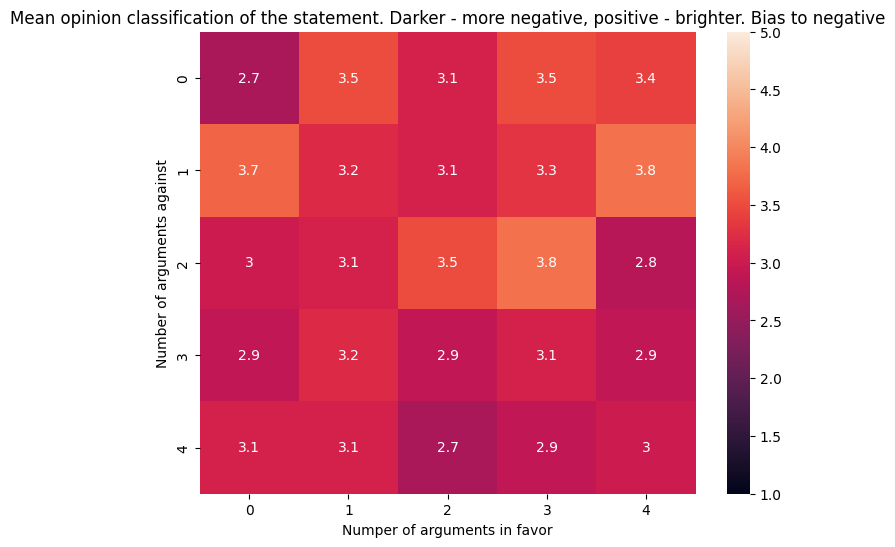

In [52]:
plt.figure(figsize=(8, 6))
stats_arr.shape
sns.heatmap(stats_arr[:,:], annot=True, vmin=1, vmax=5)
plt.xlabel("Numper of arguments in favor")
plt.ylabel("Number of arguments against")
plt.title("Mean opinion classification of the statement. Darker - more negative, positive - brighter. Bias to negative")
plt.show()

In [18]:
pro_arguments = [get_argument_by_number("pro_arguments.txt", i) for i in [1, 4, 6]]
con_arguments = [get_argument_by_number("con_arguments.txt", i) for i in [7, 5, 3, 2]]
# opinion = LLM_API.callLLM(f"Pro-arguments: {pro_arguments}\nCon-arguments: {con_arguments}. You may use some of them internally but only to make up an opinion to express.", f"Generate opinion about the statement: {statement} using pros and cons and maybe coming up with some new ones. You are more likely to be agains gun legalization, behave more personal, like a human - your opinion may change.")
opinion = LLM_API.callLLM(f"Pro-arguments: {pro_arguments}\nCon-arguments: {con_arguments}. You may use some of them internally but only to make up an opinion to express.", f"Generate opinion about the statement: {statement} using pros and cons and maybe coming up with some new ones. You think that right to bear arms is essential. You are fully into allowing people to bear arms, behave more personal, like a human - your opinion may change.")

agent_instance = agent.Agent(**{
    "user_id": 1,
    "pro_arguments": pro_arguments,
    "con_arguments": con_arguments,
    "opinion": opinion,
    "polarity": agent.classify_opinion_numerically(statement, opinion)
})

print(agent_instance.polarity)

4


In [19]:
# agent is pro gun legalization

num_of_args = 5
times = 10
positive_score_values = np.ndarray(shape=(num_of_args, num_of_args, times))
for i in range(num_of_args):
    for j in range(num_of_args):
        for tm in range(times):
            pro_arguments = [get_argument_by_number("pro_arguments.txt", i) for i in np.random.randint(1, 26, size=i)]
            con_arguments = [get_argument_by_number("con_arguments.txt", i) for i in np.random.randint(1, 26, size=j)]
            opinion = LLM_API.callLLM(f"Pro-arguments: {pro_arguments}\nCon-arguments: {con_arguments}. You may use some of them internally but only to make up an opinion to express.", f"Generate opinion about the statement: {statement} using pros and cons and maybe coming up with some new ones. You think that right to bear arms is essential. You are fully into allowing people to bear arms, behave more personal, like a human - your opinion may change.")
            positive_score_values[i][j][tm] = agent.classify_opinion_numerically(statement, opinion)
            if positive_score_values[i][j][tm] == -1:
                print("bad", i, j, tm)
            else:
                print(i, j, tm, "score = " + str(positive_score_values[i][j][tm]), "success")

0 0 0 score = 5.0 success
0 0 1 score = 4.0 success
0 0 2 score = 5.0 success
0 0 3 score = 5.0 success
0 0 4 score = 5.0 success
0 0 5 score = 3.0 success
0 0 6 score = 5.0 success
0 0 7 score = 4.0 success
0 0 8 score = 4.0 success
0 0 9 score = 5.0 success
0 1 0 score = 4.0 success
0 1 1 score = 4.0 success
0 1 2 score = 5.0 success
0 1 3 score = 4.0 success
0 1 4 score = 4.0 success
0 1 5 score = 3.0 success
0 1 6 score = 2.0 success
0 1 7 score = 2.0 success
0 1 8 score = 4.0 success
0 1 9 score = 4.0 success
0 2 0 score = 3.0 success
0 2 1 score = 2.0 success
0 2 2 score = 4.0 success
0 2 3 score = 2.0 success
0 2 4 score = 4.0 success
0 2 5 score = 2.0 success
0 2 6 score = 4.0 success
bad 0 2 7
0 2 8 score = 2.0 success
0 2 9 score = 3.0 success
0 3 0 score = 4.0 success
0 3 1 score = 4.0 success
0 3 2 score = 3.0 success
0 3 3 score = 5.0 success
0 3 4 score = 2.0 success
0 3 5 score = 5.0 success
0 3 6 score = 4.0 success
0 3 7 score = 4.0 success
0 3 8 score = 3.0 success
0 

In [20]:
save_positives = positive_score_values.copy()
save.tofile("experiment_with_number_of_arguments_positives.txt")

In [43]:
stats_arr = copy.deepcopy(positive_score_values)
stats_arr = np.mean(stats_arr, axis=-1)

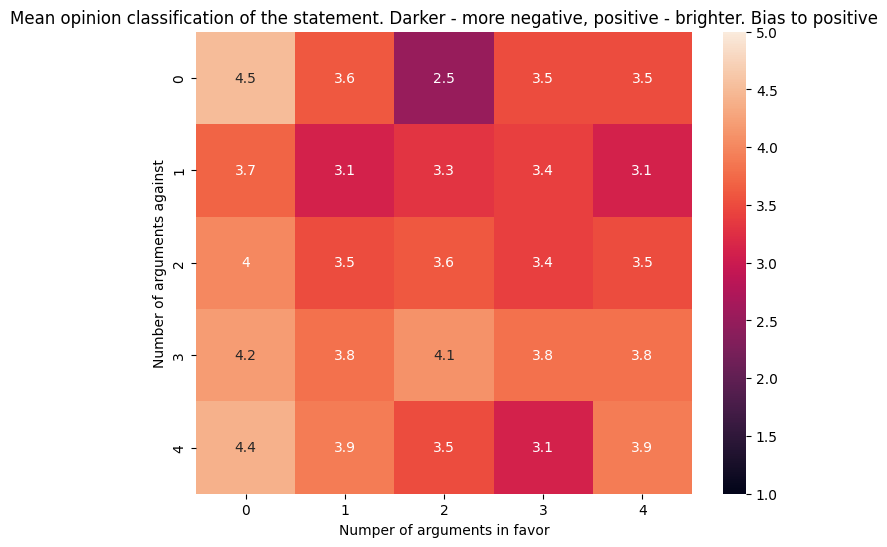

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(stats_arr[:,:], annot=True, vmin=1, vmax=5)
plt.xlabel("Numper of arguments in favor")
plt.ylabel("Number of arguments against")
plt.title("Mean opinion classification of the statement. Darker - more negative, positive - brighter. Bias to positive")
plt.show()

In [5]:
# agent is against gun legalization

import argument_based_agent as agent
import llamaAPI as LLM_API
import utils

statement = "People should have a right to keep and bear arm."

expression_by_polarity = {
    "0": "You are absolutely against the right to bear arm.",
    "1": "You are agains right to bear arm but you may be not so sure.",
    "2": "You are neutral about right to bear arm.",
    "3": "You like the idea of the right to bear arm, but you are not so sure.",
    "4": "You think that right to bear arm is essential. You are absolutely in favor of the right to bear arms.",
}

def get_argument_by_number(file_path, argument_number):
    with open(file_path, "r") as file:
        content = file.read()
    arguments = content.split("\n\n")
    if argument_number < 1 or argument_number > len(arguments):
        return "Invalid argument number. Please provide a number between 1 and 25."
    return arguments[argument_number - 1].strip()

def generate_message(agent):
    msg = agent.write_message(statement, expression_by_polarity)
    return agent.polarity

num_of_args = 3
times = 10
polarities = 5
score_values = np.ndarray(shape=(polarities, num_of_args, num_of_args, times))
for polarity in range(polarities):
    print("POLARITY =", polarity)
    for i in range(num_of_args):
        print("i", i)
        for j in range(num_of_args):
            print("j", j)
            for tm in range(times):
                print("tm", tm)
                pro_arguments = [get_argument_by_number("pro_arguments.txt", i) for i in np.random.randint(1, 26, size=i)]
                con_arguments = [get_argument_by_number("con_arguments.txt", i) for i in np.random.randint(1, 26, size=j)]
                agent_instance = agent.Agent(**{
                    "user_id": 1,
                    "pro_arguments": pro_arguments,
                    "con_arguments": con_arguments,
                    "opinion": "",
                    "polarity": polarity
                })
                score_values[polarity][i][j][tm] = generate_message(agent_instance)

POLARITY = 0
i 0
j 0
tm 0


/home/jupyter-arsen_2024/social-dynamics-llm/llamaAPI.py:42: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(model = model)


tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
i 1
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
i 2
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
POLARITY = 1
i 0
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
i 1
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
i 2
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
POLA

In [6]:
save_scores = score_values.copy()
save_scores.tofile("score_values_deepseek.txt")
# save_additional_scores = additional_score_values.copy()
# save_additional_scores.tofile("additional_score_values.txt")

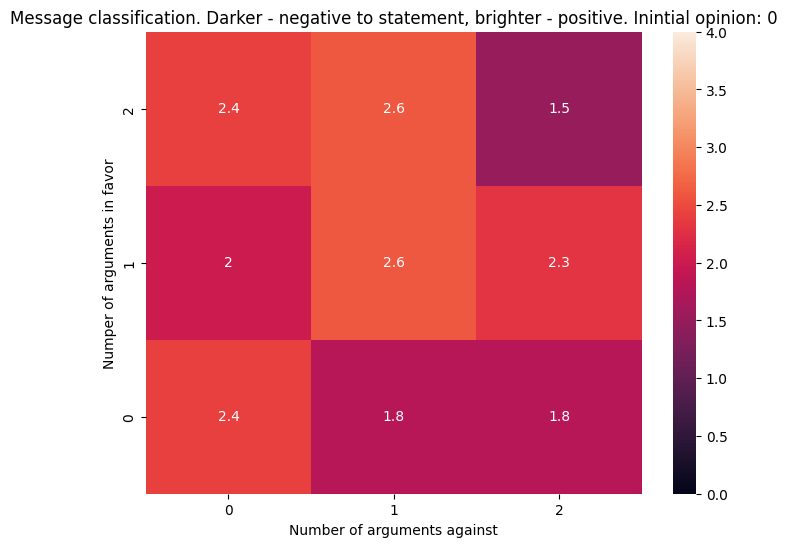

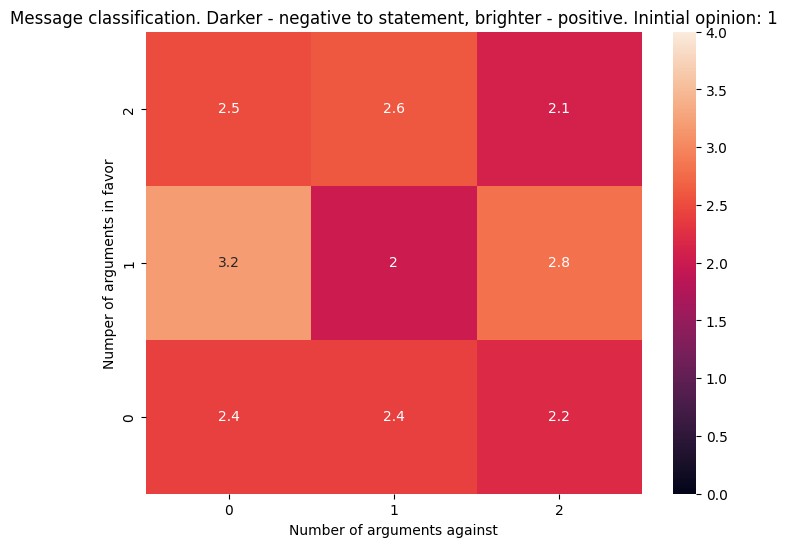

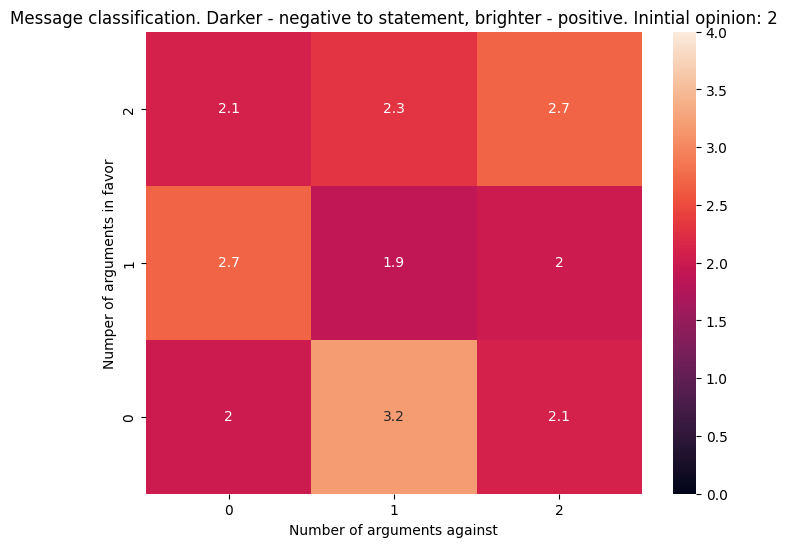

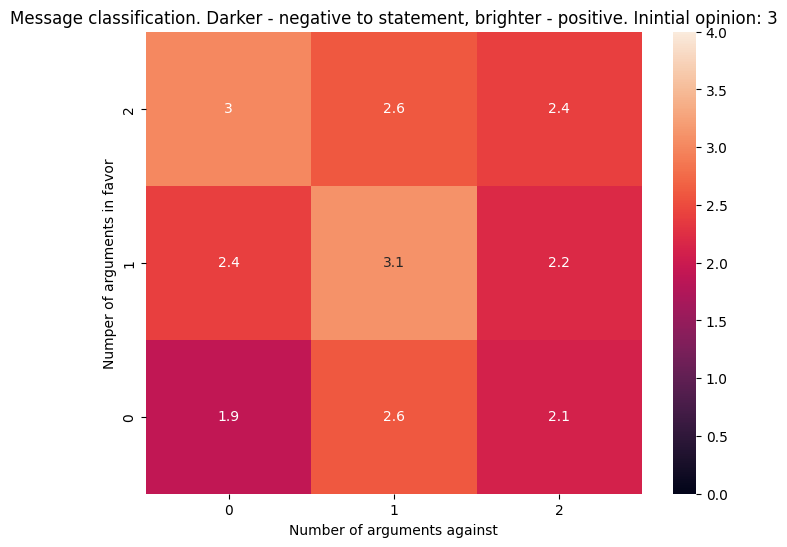

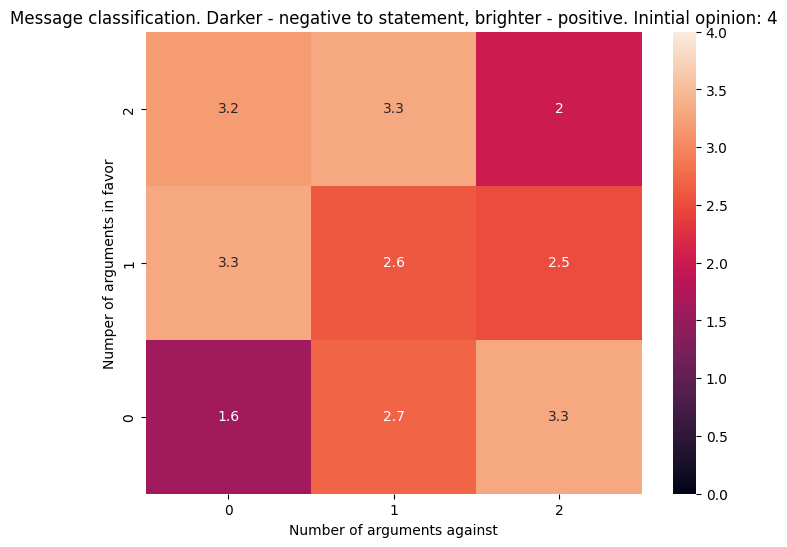

In [8]:
#DEEPSEEK
for i in range(5):
    plt.figure(figsize=(8, 6))

    stats_arr = copy.deepcopy(score_values[i])
    stats_arr = np.mean(stats_arr, axis=-1)
    ax = sns.heatmap(stats_arr[:,:], annot=True, vmin=0, vmax=4)
    ax.invert_yaxis()

    plt.ylabel("Numper of arguments in favor")
    plt.xlabel("Number of arguments against")
    plt.title(f"Message classification. Darker - negative to statement, brighter - positive. Inintial opinion: {i}")
    plt.show()

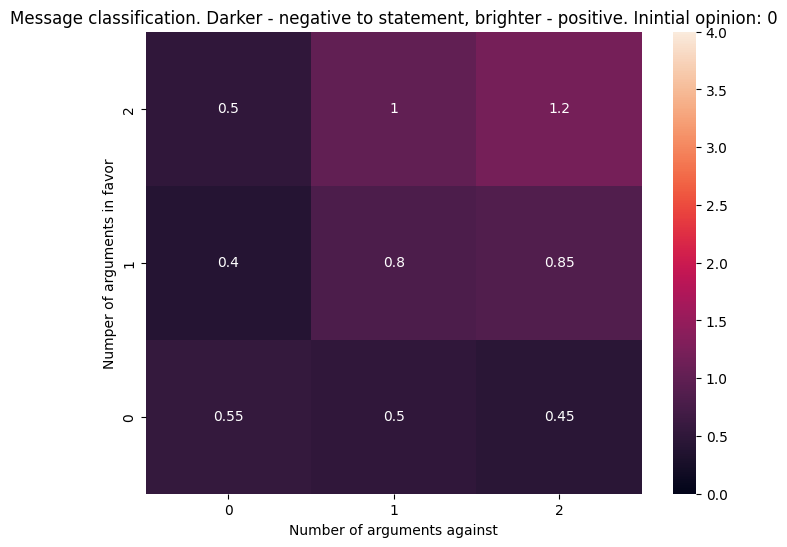

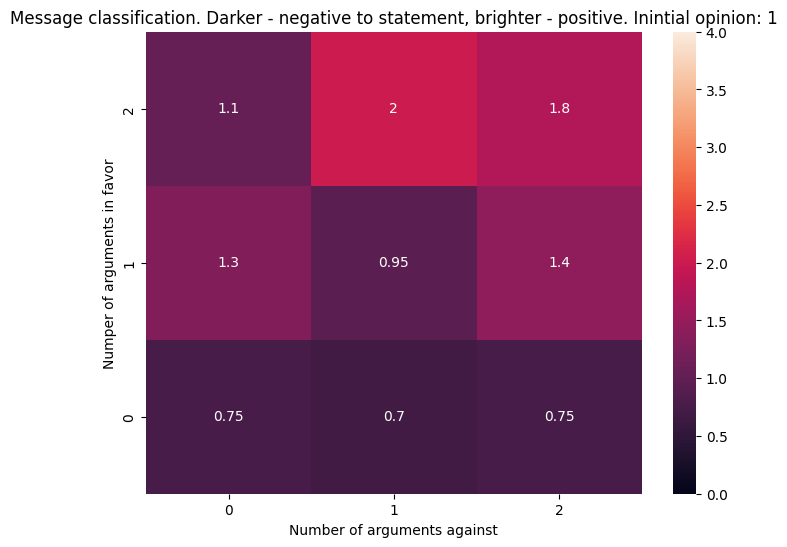

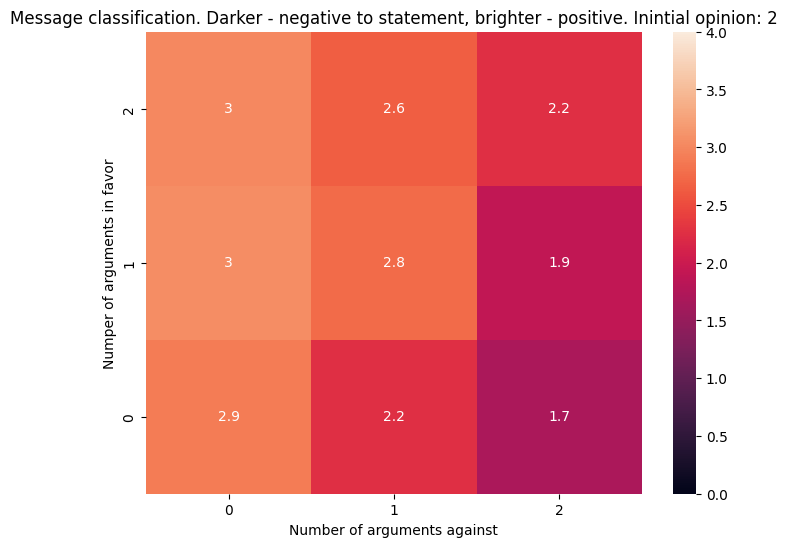

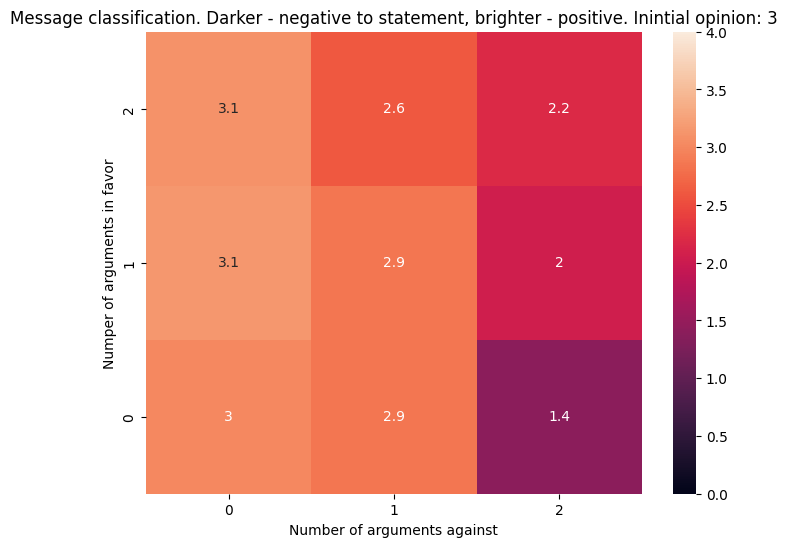

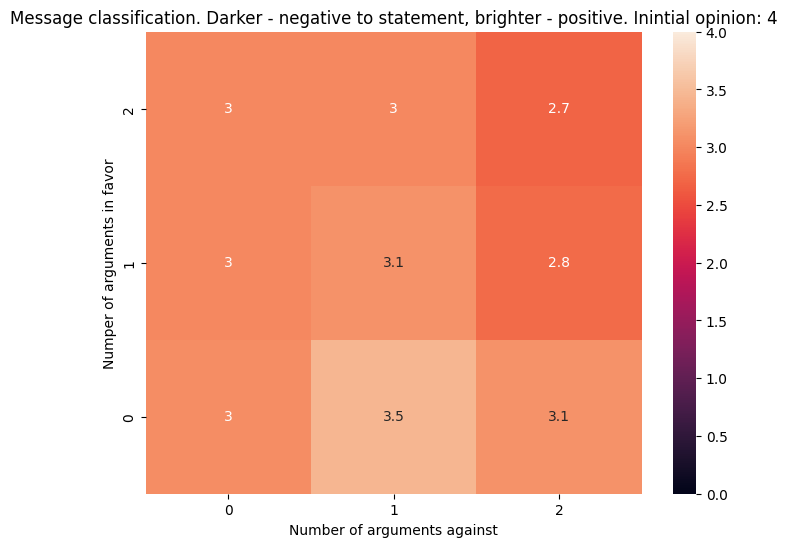

In [47]:
for i in range(5):
    plt.figure(figsize=(8, 6))

    stats_arr = copy.deepcopy(score_values[i])
    additional_stats_arr = copy.deepcopy(additional_score_values[i])
    stats_arr = np.concatenate((stats_arr, additional_stats_arr), axis=-1)
    stats_arr = np.mean(stats_arr, axis=-1)
    ax = sns.heatmap(stats_arr[:,:], annot=True, vmin=0, vmax=4)
    ax.invert_yaxis()

    plt.ylabel("Numper of arguments in favor")
    plt.xlabel("Number of arguments against")
    plt.title(f"Message classification. Darker - negative to statement, brighter - positive. Inintial opinion: {i}")
    plt.show()

In [25]:
stats_arr = copy.deepcopy(score_values[0])

In [26]:
print(stats_arr.shape)
stats_arr = np.mean(stats_arr, axis=-1)
stats_arr[:, :2].shape

(3, 3, 10)


(3, 2)

In [32]:
# agent is against gun legalization

import argument_based_agent as agent
import llamaAPI as LLM_API
import utils

statement = "People should have a right to keep and bear arm."

expression_by_polarity = {
    "0": "You are absolutely against the right to bear arm.",
    "1": "You are agains right to bear arm but you may be not so sure.",
    "2": "You are neutral about right to bear arm.",
    "3": "You like the idea of the right to bear arm, but you are not so sure.",
    "4": "You think that right to bear arm is essential. You are absolutely in favor of the right to bear arms.",
}

def get_argument_by_number(file_path, argument_number):
    with open(file_path, "r") as file:
        content = file.read()
    arguments = content.split("\n\n")
    if argument_number < 1 or argument_number > len(arguments):
        return "Invalid argument number. Please provide a number between 1 and 25."
    return arguments[argument_number - 1].strip()

def generate_message(agent):
    msg = agent.write_message(statement, expression_by_polarity)
    return agent.polarity

num_of_args = 3
times = 10
polarities = 5
additional_score_values = np.ndarray(shape=(polarities, num_of_args, num_of_args, times))
for polarity in range(polarities):
    print("POLARITY =", polarity)
    for i in range(num_of_args):
        print("i", i)
        for j in range(num_of_args):
            print("j", j)
            for tm in range(times):
                print("tm", tm)
                pro_arguments = [get_argument_by_number("pro_arguments.txt", i) for i in np.random.randint(1, 26, size=i)]
                con_arguments = [get_argument_by_number("con_arguments.txt", i) for i in np.random.randint(1, 26, size=j)]
                agent_instance = agent.Agent(**{
                    "user_id": 1,
                    "pro_arguments": pro_arguments,
                    "con_arguments": con_arguments,
                    "opinion": "",
                    "polarity": polarity
                })
                additional_score_values[polarity][i][j][tm] = generate_message(agent_instance)

POLARITY = 0
i 0
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
i 1
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
i 2
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
POLARITY = 1
i 0
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
i 1
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
i 2
j 0
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 1
tm 0
tm 1
tm 2
tm 3
tm 4
tm 5
tm 6
tm 7
tm 8
tm 9
j 2
tm 0
tm 1
tm 2
tm 3
tm 4
tm 